<a href="https://colab.research.google.com/github/Hardes1/HW_AVS4/blob/main/%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%22s10_viz_plt_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# s10. Визуализация с `Matplotlib`

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

%matplotlib inline 

<center>
<img src="https://github.com/hse-econ-data-science/dap_2021_spring/blob/main/sem10_visual/images/visual.png?raw=true" height="400" width="700">
</center>

Визуализация занимает важную часть в анализе данных. Представляя информацию в графическом виде, вы облегчаете процесс ее восприятия, что дает возможность выделять дополнительные закономерности, оценивать соотношения величин, быстрее доносить ключевые аспекты в данных.

Начнем с небольшой "памятки", о которой всегда нужно помнить при создании любых графиков.

## Вредные советы

1. **Заголовок** графика для слабаков. По графику всегда понятно, какие данные и явления он описывает.
2. Ни в коем случае не **подписывай** ни одной **оси** у графика. Пусть смотрящий развивает свою интуицую!
3. **Единицы измерения** совсем не обязательны. Какая разница, в чем измеряли количество - в людях или в литрах!
4. Чем меньше **шрифт** на графике, тем острее зрение смотрящего.
5. На одном графике нужно стараться уместить всю информацию, которая у тебя есть в датасете. С полными названиями, расшифровками, сносками. Чем больше текста - тем информативнее!
6. При любой возможности используйте 3D и спецэффекты, пусть знают, что ты — прирожденный дизайнер. К тому же, так будет меньше визуальных искажений.

Если серьезно, то обязательно посмотрите список рекомендованных материалов в конце ноутбука по правилам оформления графиков и работе с библиотеками для визуализации данных в Python.  

Основные библиотеки для визуализации в Python - это `matplotlib`, `seaborn`, `plotly`. Сегодня познакомимся с `matplotlib`

## Данные

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Работаем с датасетом по продажам и оценкам видео-игр. Датасет взят с [Кеггла](https://www.kaggle.com/rush4ratio/video-game-sales-with-ratings).

__Описание колонок:__
* `Name` $-$ название видеоигры
* `Platform` $-$ платформа, на которой игра была запущена
* `Year_of_Release` $-$ год релиза
* `Genre` $-$ жанр
* `Publisher` $-$ издатель
* `NA_Sales` $-$ объем продаж в Северной Америке (в млн штук)
* `EU_Sales` $-$ объем продаж в Евросоюзе (в млн штук)
* `JP_Sales` $-$ объем продаж в Японии (в млн штук)
* `Other_Sales` $-$ объем продаж в остальном мире (в млн штук)
* `Global_Sales` $-$ общий объем продаж (в млн штук)
* `Critic_Score` $-$ совокупный балл, составленный сотрудниками Metacritic
* `Critic_Count` $-$ кол-во критиков, оцениваемых игру
* `User_Score` $-$ совокупный балл, составленный подписчиками Metacritic (пользователями)
* `User_Count` $-$ кол-во пользователей, оцениваемых игру
* `Developer` $-$ ответственный за создание игры
* `Rating` $-$ рейтинг (Everyone, Teen, Adults Only и тд)

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/андан/video_games_sales.csv')
df.head()

In [ ]:
df.isna().sum()

There are a lot of NaNs in the data, so let's throw out all the missing observations. We also see that some of the pandas columns have been converted to the wrong type. Let's fix this:

In [ ]:
df = df.dropna()

In [ ]:
df.dtypes

In [ ]:
df.shape

## Варианты графиков

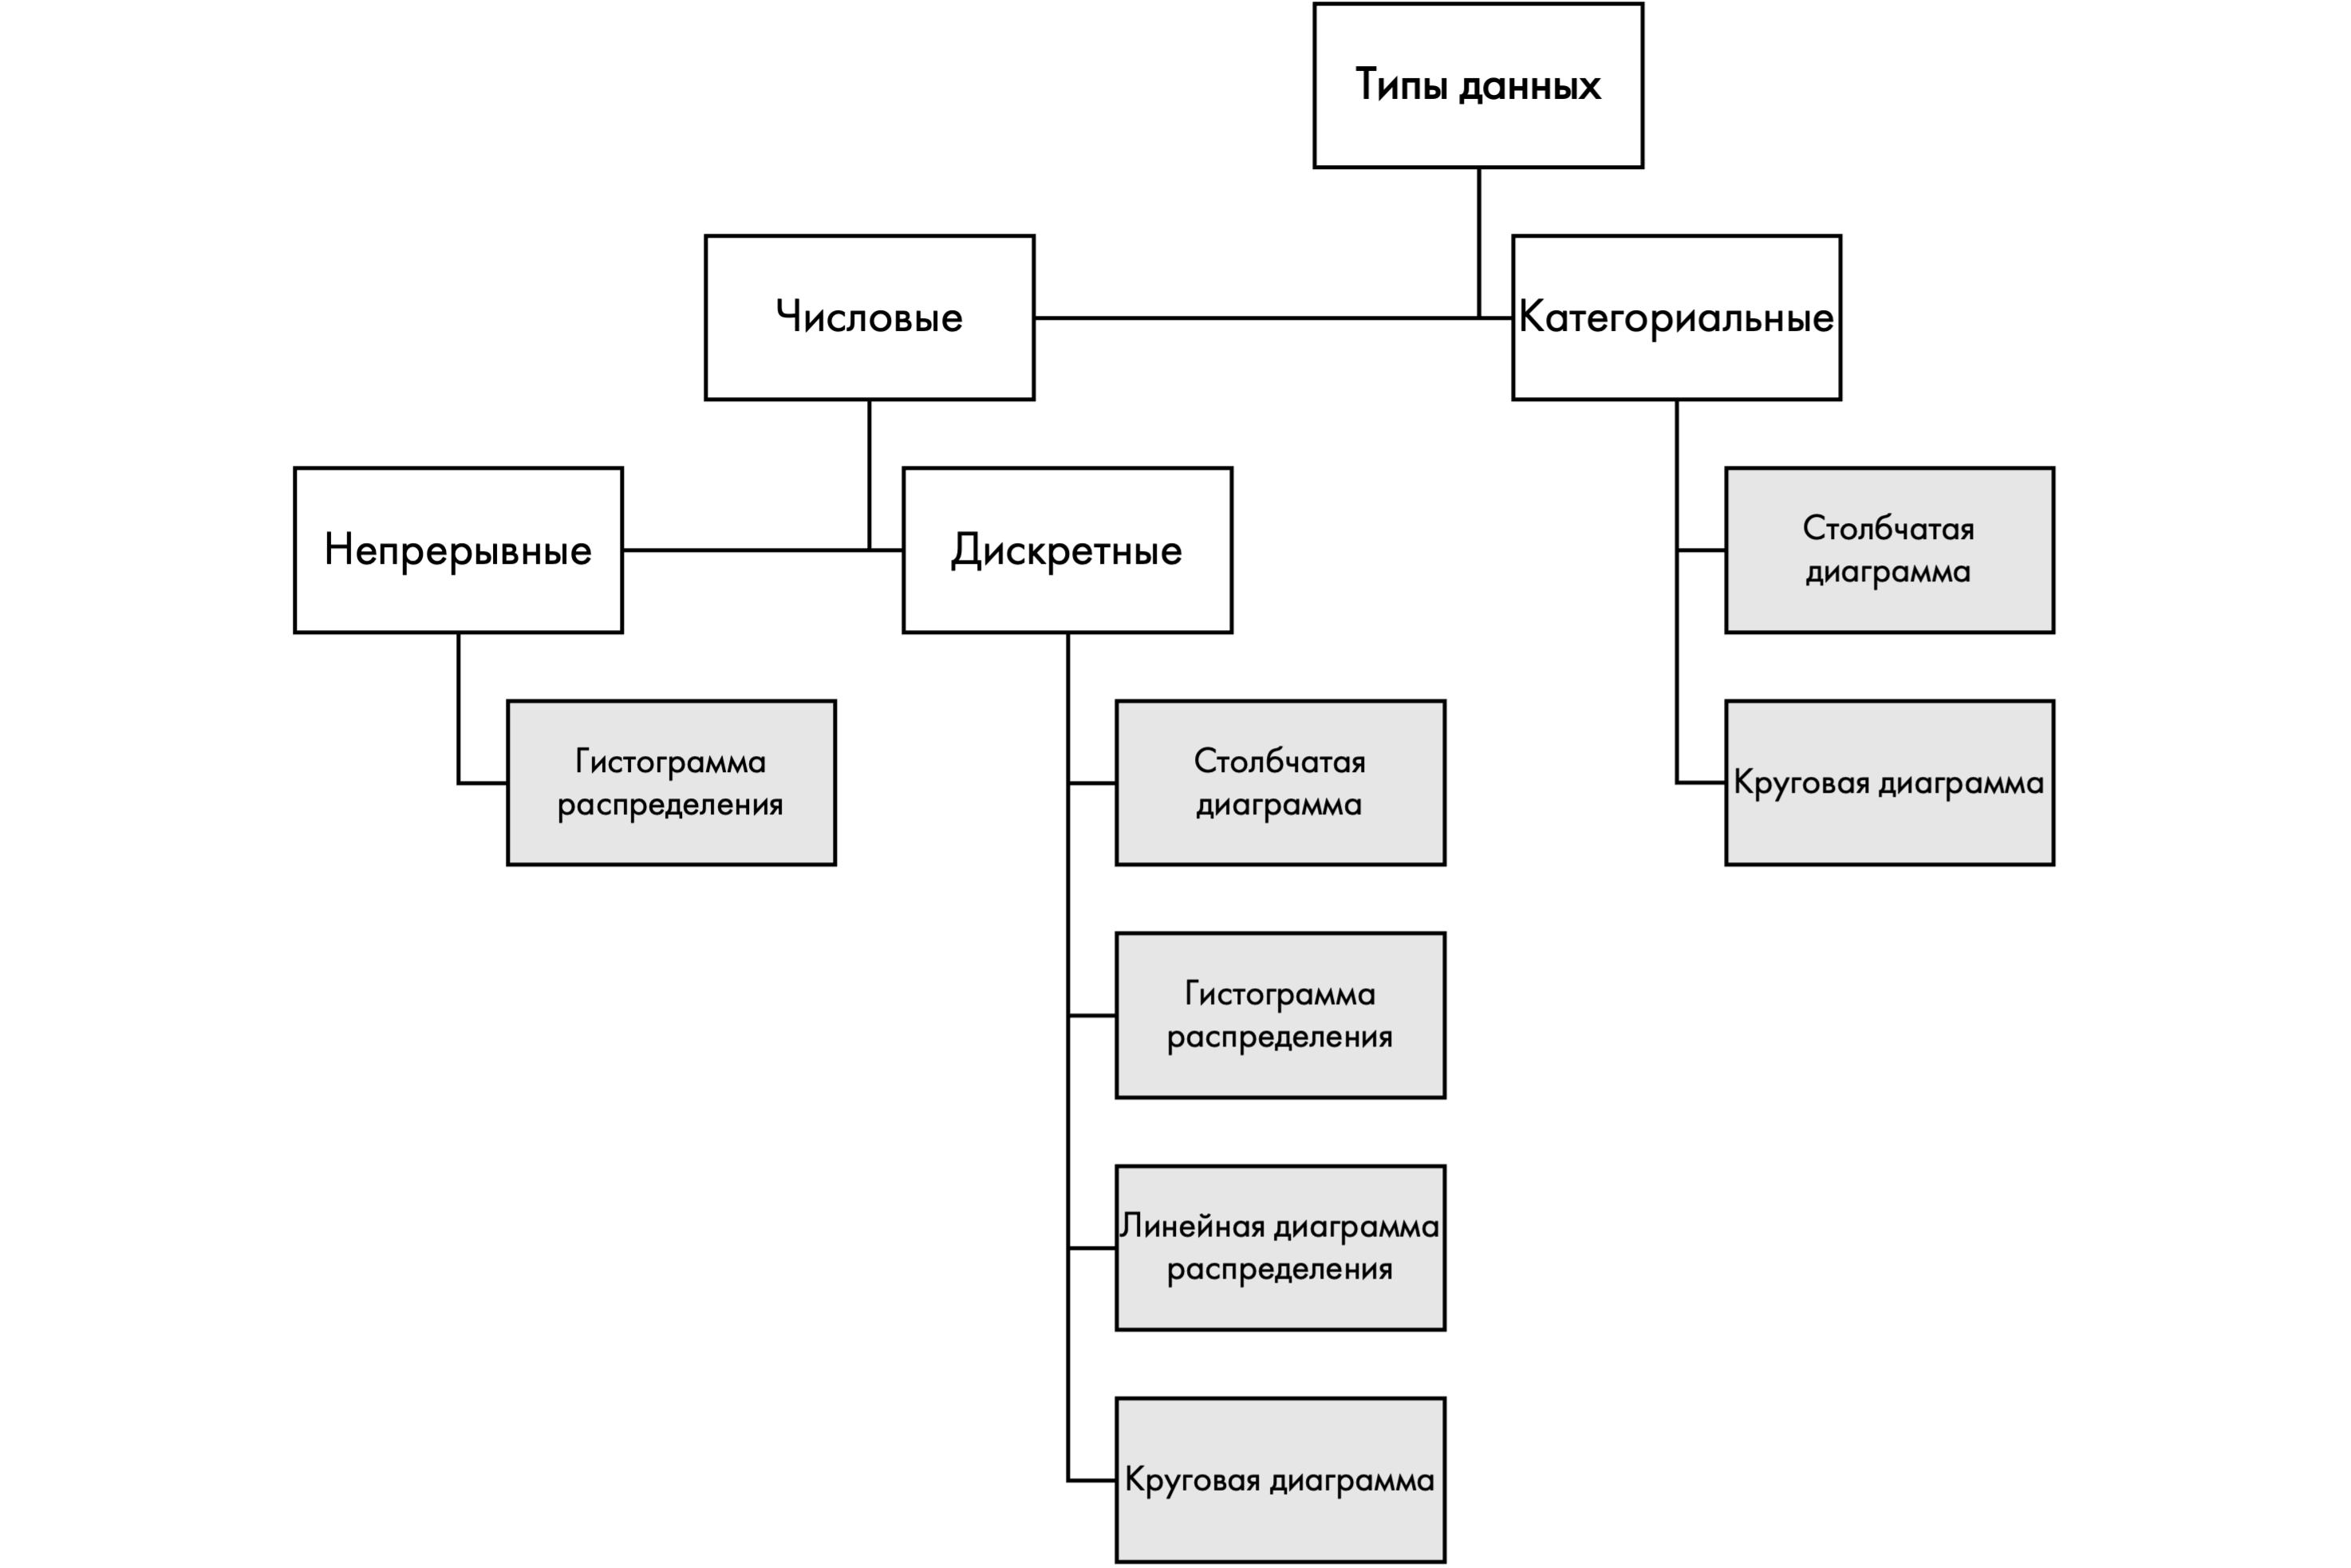

### Гистограмма

In [ ]:
df.NA_Sales.hist(bins=30)

In [ ]:
df.NA_Sales.plot(kind='hist', bins=30)

In [ ]:
plt.hist(df.NA_Sales, bins=30)

### Линейный график

In [ ]:
df.groupby('Year_of_Release')['Global_Sales'].sum()

NameError: ignored

In [ ]:
df.groupby('Year_of_Release')['Global_Sales'].sum().index

In [ ]:
df.groupby('Year_of_Release')['Global_Sales'].sum().values

In [ ]:
df.groupby('Year_of_Release')['Global_Sales'].sum().plot()

In [ ]:
x = df.groupby('Year_of_Release')['Global_Sales'].sum().index
y = df.groupby('Year_of_Release')['Global_Sales'].sum().values
plt.plot(x, y)

### Столбчатая диаграмма

In [ ]:
df.groupby('Year_of_Release')['Global_Sales'].sum().plot(kind = 'bar')

In [ ]:
df.groupby('Year_of_Release')['Global_Sales'].sum().plot(kind = 'barh')

In [ ]:
x = df.groupby('Year_of_Release')['Global_Sales'].sum().index
y = df.groupby('Year_of_Release')['Global_Sales'].sum().values
plt.bar(x, y)

NameError: ignored

### Круговая диаграмма

In [ ]:
df.groupby('Year_of_Release')['Global_Sales'].sum().tail()

NameError: ignored

In [ ]:
df.groupby('Year_of_Release')['Global_Sales'].sum().tail().plot(kind = 'pie')

In [ ]:
x = df.groupby('Year_of_Release')['Global_Sales'].sum().tail()
plt.pie(x.values, labels = x.index)
#plt.show()

### Ящик с усами

In [ ]:
df.NA_Sales.plot.box()

In [ ]:
plt.boxplot(df.NA_Sales)
plt.show()

In [ ]:
plt.boxplot(df.NA_Sales, vert=False)
plt.show()

## Базовый дизайн

### Стиль

In [ ]:
x = df.groupby('Year_of_Release')['Global_Sales'].sum().index
y = df.groupby('Year_of_Release')['Global_Sales'].sum().values

In [ ]:
#Базовый
plt.plot(x, y)

Все возможные стили графиков:

In [ ]:
print(plt.style.available)

In [ ]:
plt.style.use('seaborn')
plt.plot(x, y)

In [ ]:
plt.style.use('ggplot')
plt.plot(x, y)

In [ ]:
plt.style.use('fivethirtyeight')
plt.plot(x, y)

### [Заголовок](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.title.html)

```plt.title("Заголовок")```

``` plt.title("Заголовок", fontsize= Размер заголовка, fontweight='Насыщенность шрифта', family = 'Тип шрифта')```

+ ```fontweight``` - насыщенность шрифта

Варианты fontweight:

```fontweight= {‘ultralight’, ‘light’, ‘normal’, ‘regular’, ‘book’, ‘medium’, ‘roman’, ‘semibold’, ‘demibold’, ‘demi’, ‘bold’, ‘heavy’, ‘extra bold’, ‘black’}``` либо численным значением в диапазоне 0-1000.

+ ```family``` - тип шрифта

Варианты family: 

```family  = {'cursive', 'fantasy', 'monospace', 'sans', 'sans serif', 'sans-serif', 'serif'}```

In [ ]:
gb = df.groupby('Year_of_Release').Global_Sales.sum()
plt.title("Динамика продаж игр в мире по годам", fontweight='bold') #заголовок
plt.plot(gb.index, gb.values)

In [ ]:
gb = df.groupby('Year_of_Release').Global_Sales.sum()
plt.title("Динамика продаж игр в мире по годам", fontweight='bold') #заголовок
plt.bar(gb.index, gb.values)

### Название осей

```plt.xlabel("Название оси X")```

```plt.ylabel("Название оси Y")```

In [ ]:
gb = df.groupby('Year_of_Release').Global_Sales.sum()

plt.title("Динамика продаж игр в мире по годам") #заголовок

plt.xlabel("Год") #Название оси X

plt.ylabel("Продажи игр, млн шт.") #Название оси Y

plt.plot(gb.index, gb.values)

In [ ]:
gb = df.groupby('Year_of_Release').Global_Sales.sum()

plt.title("Динамика продаж игр в мире по годам") #заголовок

plt.xlabel("Год") #Название оси X

plt.ylabel("Продажи игр, млн шт.") #Название оси Y

plt.bar(gb.index, gb.values)

### [Размер и четкость](https://matplotlib.org/stable/api/figure_api.html)

``` plt.figure(figsize=(Ширина, Высота), dpi = Четкость)```

In [ ]:
gb = df.groupby('Year_of_Release').Global_Sales.sum()

plt.figure(figsize=(16, 10), dpi=80) #Размер и четкость

#plt.figure(figsize=(16, 10)) #размер

#plt.figure(dpi=80) #четкость

plt.title("Динамика продаж игр в мире по годам") #заголовок

plt.xlabel("Год") #Название оси X

plt.ylabel("Продажи игр, млн шт.") #Название оси Y

plt.plot(gb.index, gb.values)

### Параметры рисунка

#### [Гистограмма](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.hist.html#)

##### Цвет

```plt.hist(данные для оси X, данные для оси Y, bins = Кол-во столбцов, color = 'Цвет')```

In [ ]:
plt.hist(df.NA_Sales, bins=30, color = '#D95D39')
plt.show()

#### [Линейный график](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html)

##### Толщина линии

```plt.plot(данные для оси X, данные для оси Y, lw = толщина линии)```

In [ ]:
gb = df.groupby('Year_of_Release').Global_Sales.sum()

plt.figure(figsize=(16, 10), dpi=80) #Размер и четкость

plt.title("Динамика продаж игр в мире по годам") #заголовок

plt.xlabel("Год") #Название оси X

plt.ylabel("Продажи игр, млн шт.") #Название оси Y

plt.plot(gb.index, gb.values, lw = 3) #изменили толщину


##### Формат штриха

```plt.plot(данные для оси X, данные для оси Y, ls = 'Формат штриха')```

Что может быть:

``` python

`-`

'--' 

'-.'

':'

''

(offset, on-off-seq)

```

In [ ]:
gb = df.groupby('Year_of_Release').Global_Sales.sum()

plt.figure(figsize=(16, 10), dpi= 80) #размер рисунка

plt.title("Динамика продаж игр в мире по годам") #заголовок

plt.xlabel("Год") #Название оси X

plt.ylabel("Продажи игр") #Название оси Y

plt.plot(gb.index, gb.values, lw = 3, ls = '-.') #изменили штрих

##### Цвет

```plt.plot(данные для оси X, данные для оси Y, color = 'Цвет')```

In [ ]:
gb = df.groupby('Year_of_Release').Global_Sales.sum()

plt.figure(figsize=(16, 10), dpi= 80)

plt.title("Динамика продаж игр в мире по годам") #заголовок

plt.xlabel("Год") #Название оси X

plt.ylabel("Продажи игр") #Название оси Y

plt.plot(gb.index, gb.values, ls = '-.', lw = 3, color = "#D95D39") #изменили цвет

#### [Столбчатая диграмма](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.bar.html#matplotlib.axes.Axes.bar)

In [ ]:
plt.bar(gb.index, gb.values)

##### Ширина столбца

```plt.bar(данные для оси X, данные для оси Y, width = Ширина)```

In [ ]:
gb = df.groupby('Year_of_Release').Global_Sales.sum()
plt.bar(gb.index, gb.values, width = 0.5)

##### Цвет

```plt.bar(данные для оси X, данные для оси Y, color = Цвет)```

In [ ]:
gb = df.groupby('Year_of_Release').Global_Sales.sum()
plt.bar(gb.index, gb.values, width = 0.5, color = '#D95D39')

#### [Круговая диаграмма](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.pie.html)

##### Цвет

```plt.pie(данные, label = подписи долей, colors = [цвет 1, цвет 2, ...])```

In [ ]:
gb = df.groupby('Year_of_Release')['Global_Sales'].sum().tail()
plt.pie(gb.values, labels = gb.index, colors = ['#EAF8BF', '#F9AB55', '#084887', '#909CC2', '#F58A07'])
plt.show()

## Несколько объектов на одном графике

### Линейный график

Один график, на котором будут отображаться сразу все показатели продаж (NA_Sales, EU_Sales, JP_Sales, Other_Sales, Global_Sales)

In [ ]:
df.head()

In [ ]:
df.columns

In [ ]:
df.groupby('Year_of_Release')[['NA_Sales','EU_Sales', 'JP_Sales', 'Other_Sales']].sum()

Первый вариант:

In [ ]:
gb = df.groupby('Year_of_Release')[['NA_Sales','EU_Sales', 'JP_Sales', 'Other_Sales']].sum()

gb.plot()

Второй вариант:

In [ ]:
gb = df.groupby('Year_of_Release')[['NA_Sales','EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']].sum()


plt.plot(gb.index, gb['NA_Sales'], label = 'North America')

plt.plot(gb.index, gb['EU_Sales'], label = 'Europe')

plt.plot(gb.index, gb['JP_Sales'], label = 'Japan')

plt.plot(gb.index, gb['Other_Sales'], label = 'Other')

plt.legend() #легенда

### Столбчатая диаграмма

In [ ]:
gb = df.groupby('Year_of_Release')[['NA_Sales','EU_Sales', 'JP_Sales', 'Other_Sales']].sum().tail()
gb

In [ ]:
gb.plot(kind='bar')

In [ ]:
gb.plot(kind='bar', stacked=True)

In [ ]:
plt.bar(gb.index, gb['NA_Sales'], label = 'North America')

plt.bar(gb.index, gb['EU_Sales'], label = 'Europe')

plt.bar(gb.index, gb['Other_Sales'], label = 'Other')

plt.bar(gb.index, gb['JP_Sales'], label = 'Japan')


plt.legend() #легенда

## Метод ``subplots``

В идеальной вселенной мы создаем графики функцией `subplots`, которая генерирует наш график в 2 переменные (обычно их называют fig и ax):

* `fig` отвечает за график в целом. Воспринимайте ее как файл, который хранит график как картинку
* `ax` $-$ это ось координат, на которой мы собственно строим график. Все элементы графика хранятся как раз в ней

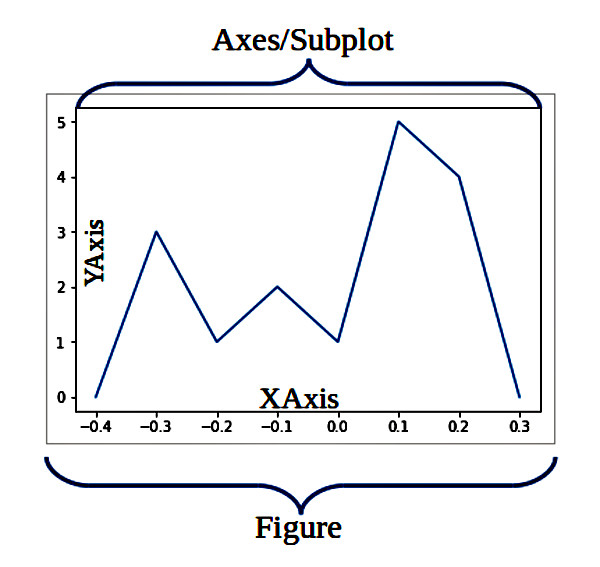

In [ ]:
fig, ax = plt.subplots(1,2) # создали полотно для графика из 1 ряда и 2 колонки (1 график)
                                         

### Базовый дизай с ``subplots``

#### Заголовок

##### [Общий заголовок](https://matplotlib.org/stable/api/figure_api.html#matplotlib.figure.Figure.suptitle)

In [ ]:
fig, ax = plt.subplots(1,2)
fig.suptitle("Заголовок");

##### [Для каждого графика ](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set_title.html)

In [ ]:
fig, ax = plt.subplots(1,2)
ax[0].set_title("Заголовок 1")
ax[1].set_title("Заголовок 2");

In [ ]:
fig, ax = plt.subplots(2,2)
ax[0][0].set_title("Заголовок 1", fontsize = 10)
ax[0][1].set_title("Заголовок 2", fontsize = 10)
ax[1][0].set_title("Заголовок 3", fontsize = 10)
ax[1][1].set_title("Заголовок 4", fontsize = 10)

#### Название осей

```ax.set_xlabel('Name X', fontsize=Font size, family='Font')```

[Документация](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set_xlabel.html#matplotlib.axes.Axes.set_xlabel)

```ax.set_ylabel('Name Y', fontsize=Font size, family='Font')```

[Документация](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set_ylabel.html)


In [ ]:
fig, ax = plt.subplots(1,2)

ax[0].set_xlabel('Ось X', fontsize=12)
ax[0].set_ylabel('Ось Y', fontsize=12)

ax[1].set_xlabel('Ось X', fontsize=12)
ax[1].set_ylabel('Ось Y', fontsize=12)

In [ ]:
fig, ax = plt.subplots(1,2)

for i in range(2):
  ax[i].set_xlabel('Ось X', fontsize=12)
  ax[i].set_ylabel('Ось Y', fontsize=12)

In [ ]:
fig, ax = plt.subplots(2,2)

ax[0][0].set_xlabel('Ось X', fontsize=12)
ax[0][0].set_ylabel('Ось Y', fontsize=12)

ax[0][1].set_xlabel('Ось X', fontsize=12)
ax[0][1].set_ylabel('Ось Y', fontsize=12)

ax[1][0].set_xlabel('Ось X', fontsize=12)
ax[1][0].set_ylabel('Ось Y', fontsize=12)

ax[1][1].set_xlabel('Ось X', fontsize=12)
ax[1][1].set_ylabel('Ось Y', fontsize=12)

In [ ]:
fig, ax = plt.subplots(2,2)

for i in range(2):
  for j in range(2):
      ax[i][j].set_xlabel('Ось X', fontsize=12)
      ax[i][j].set_ylabel('Ось Y', fontsize=12)

#### Размер и четкость

```fig, ax = plt.subplots(1,1, figsize=(width, height))```

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(10,5))

#### Параметры рисунка

```ax.plot(X-axis, Y-axis, color = "color", ls = 'Line format', lw = thickness)```

In [ ]:
x1 = df.groupby('Year_of_Release')['Global_Sales'].sum().index
y1 = df.groupby('Year_of_Release')['Global_Sales'].sum().values


fig, ax = plt.subplots(1,2, figsize=(10,5))

ax[0].hist(df.NA_Sales, bins=30)
ax[1].plot(x1, y1)

In [ ]:
x1 = df.groupby('Year_of_Release')['Global_Sales'].sum().index
y1 = df.groupby('Year_of_Release')['Global_Sales'].sum().values

x2 = df.groupby('Year_of_Release')['Global_Sales'].sum().index
y2 = df.groupby('Year_of_Release')['Global_Sales'].sum().values

x3 = df.groupby('Year_of_Release')['NA_Sales'].sum().index
y3 = df.groupby('Year_of_Release')['NA_Sales'].sum().values


fig, ax = plt.subplots(2,2, figsize=(10,10))

#1 график
ax[0][0].hist(df.NA_Sales, bins=30, color = '#909CC2')

#2 график
ax[0][1].plot(x1, y1, color = '#F9AB55')

#3 график
ax[1][0].barh(x2, y2, color = '#F9AB55')

#4 график
ax[1][1].plot(x2, y2, label = 'Global', color = '#F9AB55')
ax[1][1].plot(x3, y3, label = 'North America' , color = '#909CC2')
ax[1][1].legend(loc=2, fontsize=8, frameon=False);


## Мультивариативный график рассеяния

Сейчас будем работать с наборам данных, который содержит информацию о количестве преступлений в штатах США в 2005 году.

In [ ]:
crimes = pd.read_csv('/content/drive/MyDrive/UoL_DA/s7/crimeRatesByState2005.tsv', sep='\t')
crimes.head()

Посмотрим на график зависимостей убийств (**murder**) от краж со взломом (**burglary**)

In [ ]:
fig, ax = plt.subplots() 
ax.scatter(crimes['murder'], crimes['burglary'])

Попробуем на график добавить дополнительную информацию, например, в качестве размера точки обозначим кол-во населения

In [ ]:
fig, ax = plt.subplots()

# добавляем параметр s (size) и говорим, какая переменная будет за него отвечать
ax.scatter(crimes['murder'], crimes['burglary'], s = crimes['population'])

Размер населения такой большой, что точка захватила всю область координат. Давайте попробуем нашу переменную масштабировать - нам же важны относительные размеры штатов относительно друг друга, а не абсолютные значения. Значения маштабирования тоже выбираем экспериментально: то, что лучше выглядит и более информативно.

In [ ]:
fig, ax = plt.subplots()
ax.scatter(crimes['murder'], crimes['burglary'], s = crimes['population']/20000)

Отлично, однако следующая проблема - слияние точек. Давайте добавим параметр прозрачности, чтобы было видно, где они накладываются друг на друга.

In [ ]:
fig, ax = plt.subplots()
ax.scatter(crimes['murder'], crimes['burglary'], s = crimes['population']/35000,
           alpha = 0.5);

Добавим теперь еще какую-нибудь переменную (например, robbery) и засунем ее в параметр цвета 

In [ ]:
fig, ax = plt.subplots()
ax.scatter(crimes['murder'],crimes['burglary'],s=crimes['population'] / 35000,
           alpha=0.5, 
           c=crimes['Robbery'])

Осталось узнать, что значит какой цвет. Для этого нужно сохранить график в переменную и передать ее как аргумент функции `colorbar()`. Также можем поменять цветовую шкалу с помощью аргумента `cmap`.

In [ ]:
fig, ax = plt.subplots()
color_graph = ax.scatter(crimes['murder'],
                         crimes['burglary'],
                         s=crimes['population'] / 35000,
                         alpha=0.5,
                         #cmap='hot',
                         c=crimes['Robbery'])
plt.colorbar(color_graph); #легенда для градации цвета (то что справа)

Последнее что тут сделаем - это подпишем штаты

In [ ]:
fig, ax = plt.subplots(figsize=(22, 10))

color_graph = ax.scatter(crimes['murder'], crimes['burglary'], s=crimes['population'] / 35000, c=crimes['Robbery'], 
                         #cmap='inferno',
                         alpha=0.5,
                         linewidth=0)

ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

ax.set_xlabel('Murder', fontsize=10)
ax.set_ylabel('Bulglarly', fontsize=10)

for i, state in enumerate(crimes['state']):  # с помощью enumerate создаем из колонок с названиями штатов объект кортежей вида индекс - название штата.
    ax.annotate(state, (crimes['murder'][i], crimes['burglary'][i]), fontsize=10)  # используем метод annotate, которому говорим, что нужно брать имя штата
                                                                                   # из кортежа, который создали с помощью enumerate, а координаты подписи задаем через
                                                                                   # значения наших переменных x и y для нужного индекса из объекта enumerate (обращается к нужному
                                                                                   # ряду в датафрейме)

plt.colorbar(color_graph) #легенда для градации цвета (то что справа)

## Задания семинара

Датасэт про посетителей ресторана

**total_bill** - размер чека

**tip** - размер чаевых

**sex** - кто оплачивал счет

**smoker** - зал для курящих/некурящих

**day** - день недели

**time** - время дня

**size** - количество гостей за столом

In [ ]:
import seaborn as sns
tips = sns.load_dataset('tips')

In [ ]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


### Задание 1

1. Посчитайте общую выручку ресторана по дням недели (**day**) и времени (**time**)

HINT: К получившейся группировке примените метод `.unstack()`

In [ ]:
import matplotlib.pyplot as plt
gb = tips.groupby(['day', 'time'])['total_bill'].sum().unstack()

2. Подберите график, который бы лучшим образом визуализировал получившуюся группировку

**Добавьте на график**

  + Заголовок (насыщенность, размер, шрифт)
  + Подписи осей (насыщенность, размер, шрифт)
  + Дизайн рисунка (цвет)
  + Легенду

ValueError: ignored

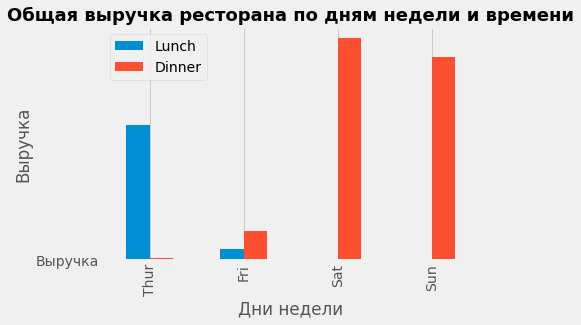

In [ ]:
tips.groupby(['day', 'time'])['total_bill'].sum().unstack().plot(kind='bar')
plt.title("Общая выручка ресторана по дням недели и времени", fontsize= 18, fontweight='bold', family = 'cursive')
plt.xlabel("Дни недели")
plt.ylabel("Выручка")
plt.bar("Дни недели", "Выручка", color = ['#D95D39', '#D95D34'])
plt.legend()
plt.bar(gb.index, gb.values, width = 0.5, color = '#D95D39')
gb.values, labels = gb.index, colors = ['#EAF8BF', '#F9AB55']

### Задание 2

1. Создайте новый признак, который показывает, сколько потратил в среднем каждый человек за столом (**total_bill**/**size**)

In [ ]:
a = tips['total_bill'] 
b = tips['size']
tips['individual_bill'] = a/b
tips

,total_bill,tip,sex,smoker,day,time,size,individual_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,8.495000
1,10.34,1.66,Male,No,Sun,Dinner,3,3.446667
2,21.01,3.50,Male,No,Sun,Dinner,3,7.003333
3,23.68,3.31,Male,No,Sun,Dinner,2,11.840000
4,24.59,3.61,Female,No,Sun,Dinner,4,6.147500
...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,9.676667
240,27.18,2.00,Female,Yes,Sat,Dinner,2,13.590000
241,22.67,2.00,Male,Yes,Sat,Dinner,2,11.335000
242,17.82,1.75,Male,No,Sat,Dinner,2,8.910000


2. Постройте круговую диаграмму, которая бы показывала кто в среднем больше тратит курильщики или нет  

**Добавьте на график**

  + Заголовок (насыщенность, размер, шрифт)
  + Дизайн рисунка (цвет)
  + Подписи долей (Курят, Не курят)
  + Подписи значений в % (параметр `autopct='%.1f'`)

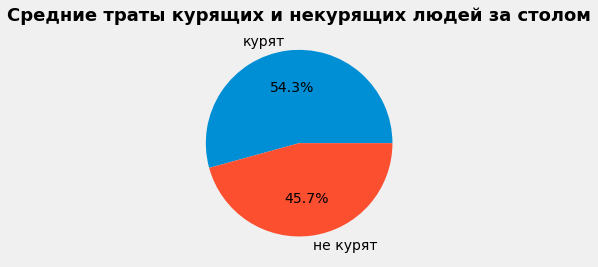

In [ ]:
from pandas.core.base import value_counts
x = tips.groupby("smoker")['individual_bill'].mean()
plt.title("Средние траты курящих и некурящих людей за столом", fontsize=18, fontweight='bold', family = 'cursive')
plt.pie(x.values, labels=['курят', 'не курят'],autopct='%1.1f%%')
plt.show()

In [ ]:
smokers = tips.smoker == 'Курят'
antismokers = tips.smoker == 'Не курят'
total_bill = tips.total_bill
#tips.groupby([tips.smoker == 'Yes'], [tips.smoker == 'No'])[total_bill].mean()
(smokers, antismokers)[total_bill].mean().value_counts()

TypeError: ignored

### Задание 3

1. Создайте признак, который бы показывал процент чаевых от каждого счета

In [ ]:
c = tips.tip
tips['chai_part'] = c / a
tips

2. Постройте график, который бы показывал зависимость между процентом чаевых и размером чека. При этом:
-  Размер точки отвечает за то, сколько в среднем потратил каждый человек за столом (мб чуть-чуть поиграть с размерностью + убедитесь, что все точки просматриваются)
-  Цвет, то в каком зале (курящих/некурящих) сидели люди

**Добавьте на график:**
  + Подписи осей
  + Легенду для цвета
  + Легенду для размера

HINT: 
- создайте два датасета с курящими и не курящими
- график строим через `.subplots()`
- Чтобы точки в легенде по цвету были одного размера:

``` python
lgnd = plt.legend()
lgnd.legendHandles[0]._sizes = [100]
lgnd.legendHandles[1]._sizes = [100]
```





 

In [ ]:
#создаем датафрейм только по курильщикам
.subplots()
#создаем датафрейм только по некурильщикам


#рисуем данные по курильщикам


#рисуем данные по некурильщикам


#добавляем подпись оси X

#добавляем подпись оси Y



#добавляем легенду по цветам точек
plt.legend(title = 'Зал', loc = 1).legendHandles[0]._sizes = [100]
plt.legend(title = 'Зал', loc = 1).legendHandles[1]._sizes = [100]

### Задание 4

Постройте систему графиков из гистограмм для всех числовых непрерывных переменных из датасета (с учетом новых признаков)

**Добавьте на график:**
  + Общий заголовок
  + Заголовок для каждого отдельного графика
  + Название оси Y
  + Отрегулируйте размер графика, чтобы все было видно

In [ ]:
#создайте subplots()

#добавьте общий заголовок

#добавьте название оси X для каждого графика

#добавьте заголовок на каждый график

for i in range(2): #цикл для строчек
  for j in range(2):#цикл для колонок
      # добавьте название оси Y